<a href="https://colab.research.google.com/github/rapco259/ANO/blob/master/ANO_cvicenie04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [ ]:
def show(image, dpi):
  plt.figure(dpi=dpi)
  plt.imshow(image)
  plt.show()

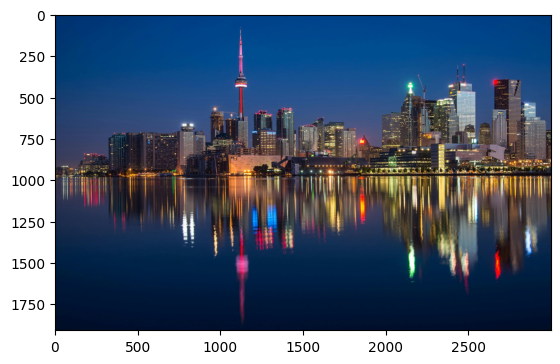

In [ ]:
img = cv.imread("/content/sample_data/torronto_skyline.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
show(img, 100)

In [ ]:
def sol_a_peper(image, prob):
  rand = np.random.random(image.shape[:2])
  sol = np.array((255,255,255), dtype=np.uint8)
  peper = np.array((0,0,0), dtype=np.uint8)
  image[rand < prob] = sol
  image[rand > 1 - prob] = peper
  return image

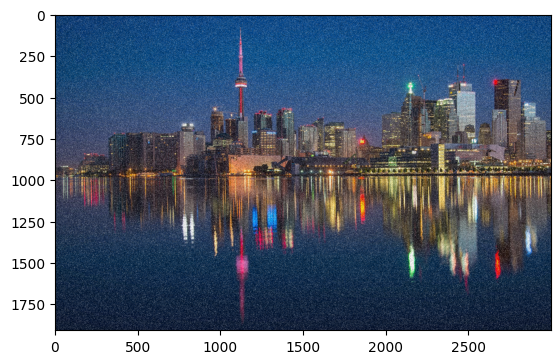

In [ ]:
salted_img = sol_a_peper(img.copy(), 0.08)
show(salted_img, 100)

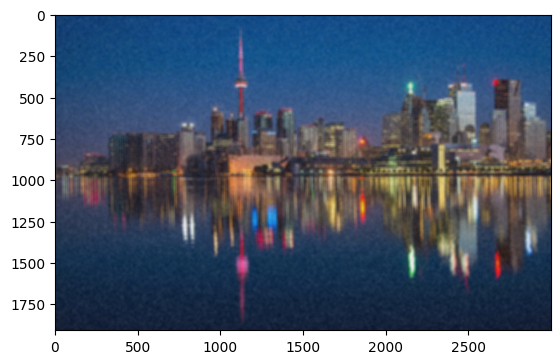

In [ ]:
blurred = cv.blur(salted_img.copy(), (20,20))
show(blurred, 100)

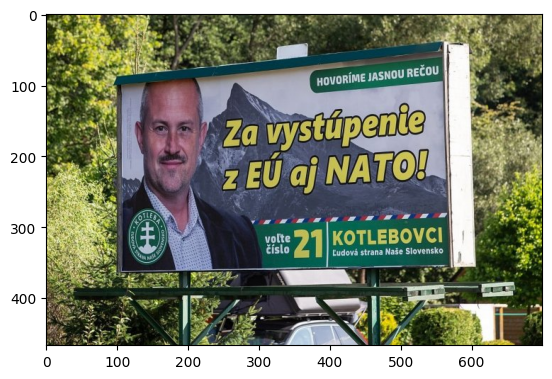

In [ ]:
img_street = cv.imread("/content/sample_data/kotreba.jpg")
img_street = cv.cvtColor(img_street, cv.COLOR_BGR2RGB)
show(img_street, 100)

kotleba:
A=106,100
B=559,53
C=108,362
D=569,353

In [ ]:
pointA = [106,100]
pointB = [559,53]
pointC = [569,353]
pointD = [108,362]
points = np.int32([pointA, pointB, pointC, pointD])
points

array([[106, 100],
       [559,  53],
       [569, 353],
       [108, 362]], dtype=int32)

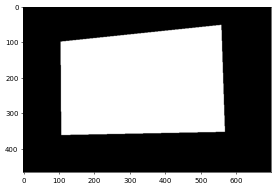

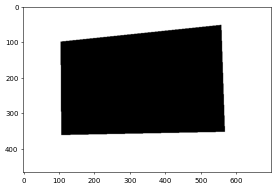

In [ ]:
mask = np.zeros_like(img_street)
white = (255,255,255)
cv.fillConvexPoly(mask, points, white)
show(mask, 50)
mask = cv.bitwise_not(mask)
show(mask, 50)

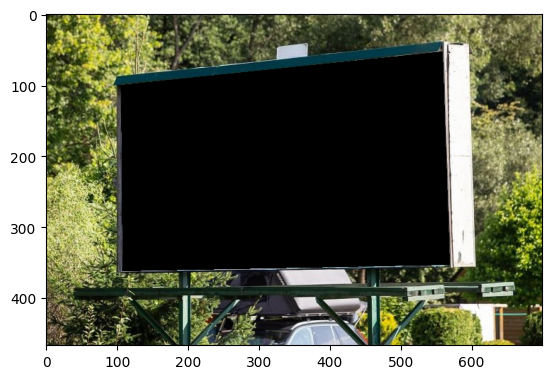

In [ ]:
background = cv.bitwise_and(img_street, mask)
show(background, 100)

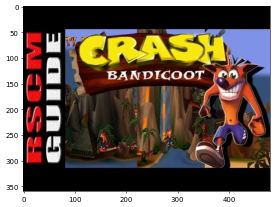

In [ ]:
img_crash = cv.imread("/content/sample_data/crash_bandicoot.jpg")
img_crash = cv.cvtColor(img_crash, cv.COLOR_BGR2RGB)
show(img_crash, 50)

In [ ]:
h, w = img_crash.shape[:2]
points_crash = np.float32([[0,0], [w,0], [w,h], [0,h]])

points_street = np.float32([pointA, pointB, pointC, pointD])
matrix = cv.getPerspectiveTransform(points_crash, points_street)
print(matrix)

[[ 7.95726148e-01  1.17662644e-03  1.06000000e+02]
 [-1.11951128e-01  7.13100256e-01  1.00000000e+02]
 [-2.64801166e-04 -4.05456399e-05  1.00000000e+00]]


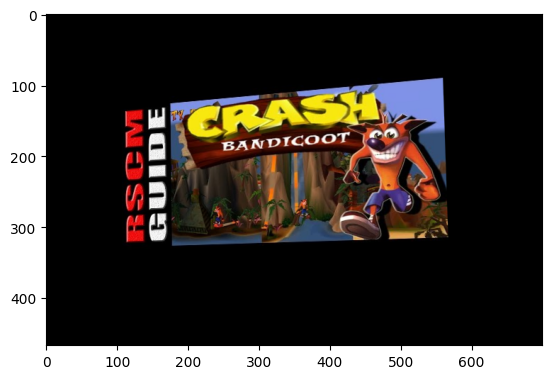

In [ ]:
height, width = img_street.shape[:2]
foreground = cv.warpPerspective(img_crash, matrix, (width,height))
show(foreground, 100)

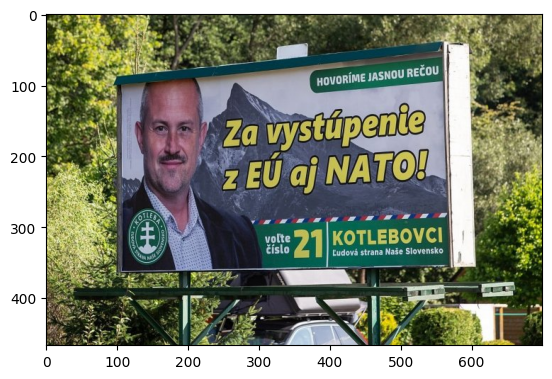

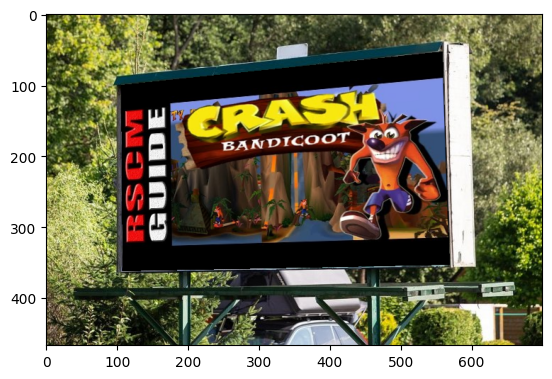

In [ ]:
result = cv.bitwise_or(background, foreground)
show(img_street, 100)
show(result, 100)